# Goal

Will training and testing error change when I randomly permute the pixels of the training images?

In [2]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import classification_report

from keras.layers import Input, Dense, Flatten
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import to_categorical

from tabulate import tabulate

In [30]:
# load in the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [31]:
# only do this for grayscale images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [6]:
# randomly permute the pixels in X_train
X_train = np.asarray([np.random.permutation(X) for X in X_train])
X_train.shape

(60000, 784)

In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
model = Sequential([
    Input(shape = (784,)),
    Dense(units = 64, activation = 'relu', use_bias = True),
    Dense(units = 64, activation = 'relu', use_bias = True),
    Dense(units = 10, activation = 'softmax', use_bias = False)
])

In [20]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [27]:
history = model.fit(
    X_train,
    y_train,
    epochs = 200,
    validation_data = (X_test, y_test)
)

Epoch 1/200
1875/1875 [==============================] - 1s 783us/step - loss: 0.9160 - accuracy: 0.6739 - val_loss: 9.5822 - val_accuracy: 0.1121
Epoch 2/200
1875/1875 [==============================] - 1s 741us/step - loss: 0.9159 - accuracy: 0.6726 - val_loss: 9.3982 - val_accuracy: 0.1114
Epoch 3/200
1875/1875 [==============================] - 1s 752us/step - loss: 0.9086 - accuracy: 0.6747 - val_loss: 9.4700 - val_accuracy: 0.1046
Epoch 4/200
1875/1875 [==============================] - 1s 780us/step - loss: 0.9109 - accuracy: 0.6749 - val_loss: 9.2899 - val_accuracy: 0.1153
Epoch 5/200
1875/1875 [==============================] - 1s 733us/step - loss: 0.9122 - accuracy: 0.6753 - val_loss: 9.5042 - val_accuracy: 0.1041
Epoch 6/200
1875/1875 [==============================] - 1s 765us/step - loss: 0.9061 - accuracy: 0.6751 - val_loss: 9.5644 - val_accuracy: 0.1162
Epoch 7/200
1875/1875 [==============================] - 1s 747us/step - loss: 0.9079 - accuracy: 0.6763 - val_loss: 9

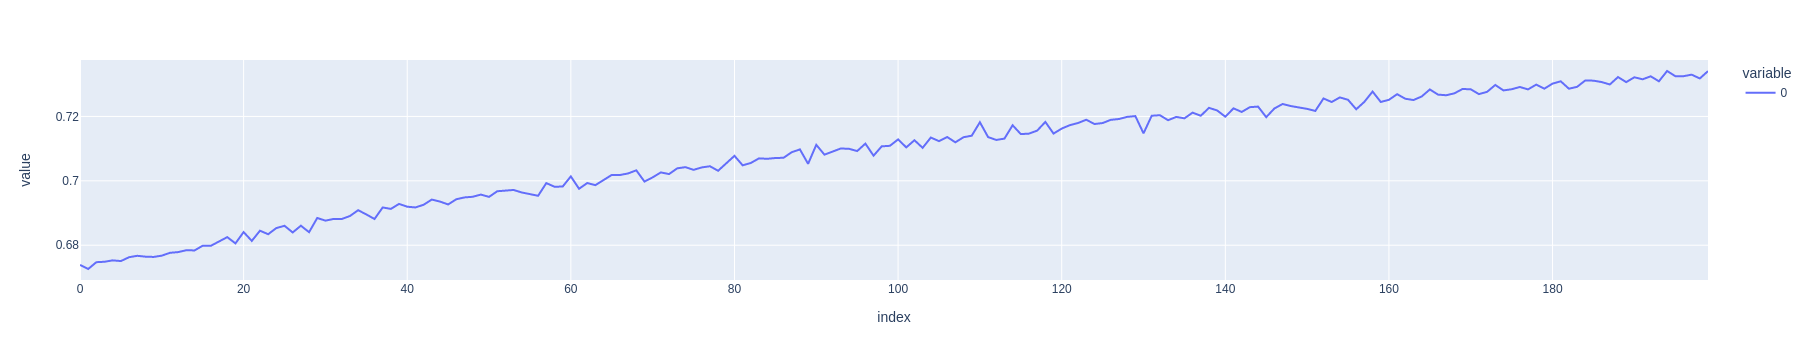

In [28]:
px.line(history.history['accuracy'])

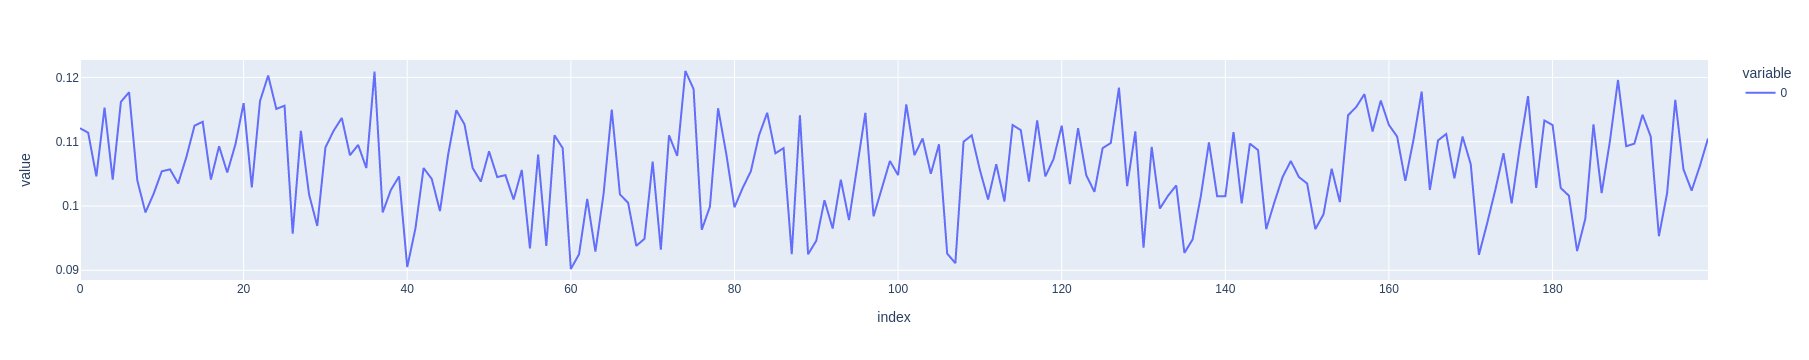

In [29]:
px.line(history.history['val_accuracy'])

## Same model, but with non-permuted pixels

In [36]:
model = Sequential([
    Input(shape = (784,)),
    Dense(units = 64, activation = 'relu', use_bias = True),
    Dense(units = 64, activation = 'relu', use_bias = True),
    Dense(units = 10, activation = 'softmax', use_bias = False)
])

In [37]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [38]:
history = model.fit(
    X_train,
    y_train,
    epochs = 300,
    validation_data = (X_test, y_test)
)

Epoch 1/300
1875/1875 [==============================] - 2s 806us/step - loss: 0.2765 - accuracy: 0.9190 - val_loss: 0.1554 - val_accuracy: 0.9520
Epoch 2/300
1875/1875 [==============================] - 1s 738us/step - loss: 0.1275 - accuracy: 0.9614 - val_loss: 0.1138 - val_accuracy: 0.9649
Epoch 3/300
1875/1875 [==============================] - 1s 743us/step - loss: 0.0910 - accuracy: 0.9715 - val_loss: 0.0971 - val_accuracy: 0.9709
Epoch 4/300
1875/1875 [==============================] - 1s 785us/step - loss: 0.0701 - accuracy: 0.9789 - val_loss: 0.0893 - val_accuracy: 0.9725
Epoch 5/300
1875/1875 [==============================] - 1s 713us/step - loss: 0.0585 - accuracy: 0.9816 - val_loss: 0.0962 - val_accuracy: 0.9722
Epoch 6/300
1875/1875 [==============================] - 1s 754us/step - loss: 0.0479 - accuracy: 0.9846 - val_loss: 0.0981 - val_accuracy: 0.9720
Epoch 7/300
1875/1875 [==============================] - 1s 792us/step - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0

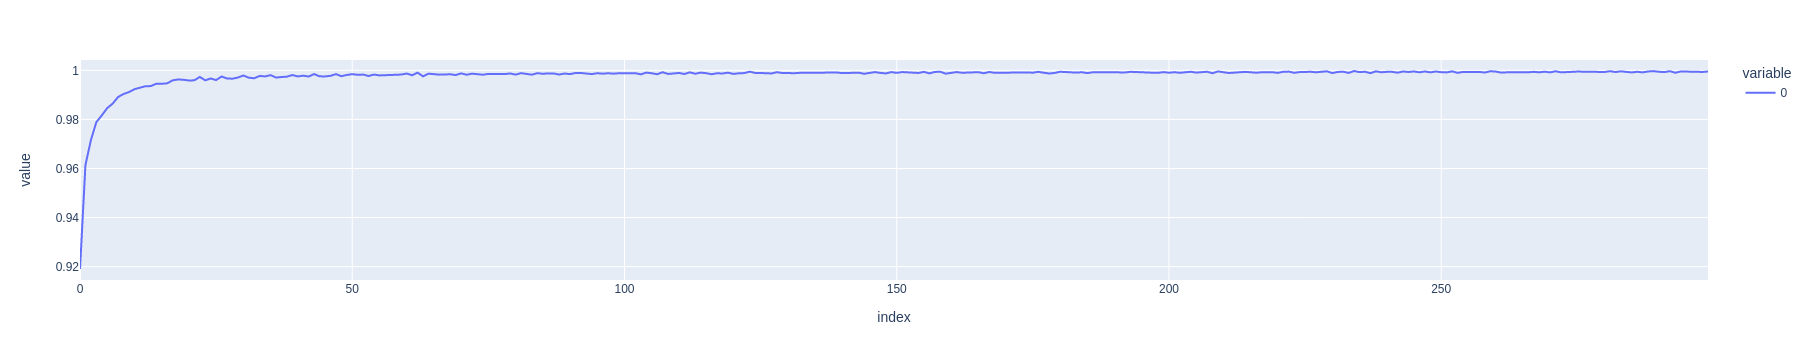

In [40]:
px.line(history.history['accuracy'])

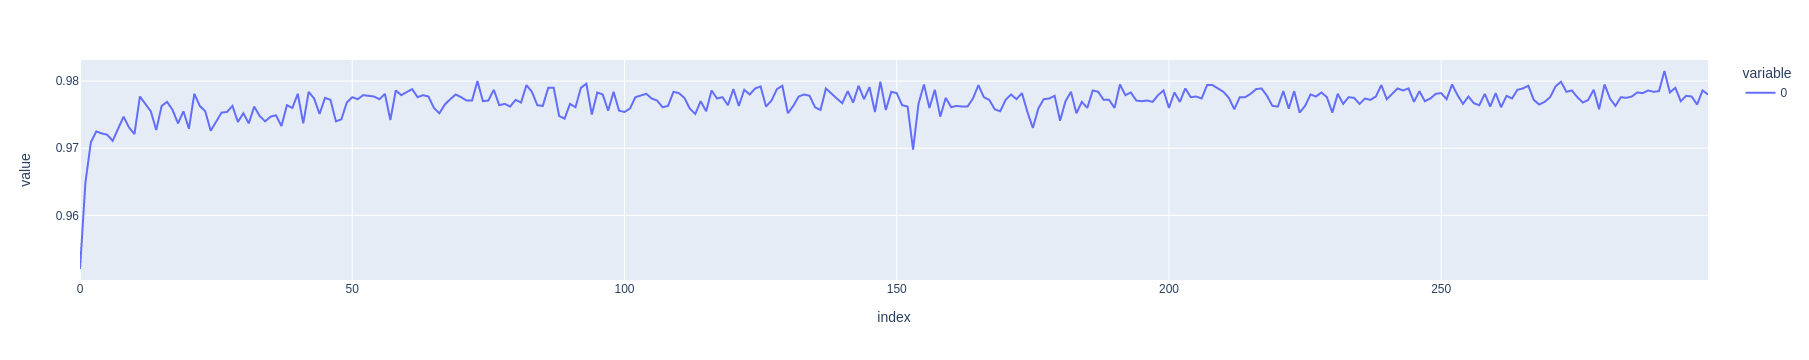

In [41]:
px.line(history.history['val_accuracy'])